In [39]:
import pandas as pd

In [106]:
data = pd.read_csv('data/wine_cleared.zip')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [41]:
data['price_round'] = data['price'].round().astype(int)
data.head(1)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35


In [42]:
regex = '\d{4}'
data['year'] = data['title'].str.findall(regex).str.get(0)
data.head(1)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013


In [43]:
print('Самая популярная страна производства')
data['country'].value_counts().head(3)

Самая популярная страна производства


US        54504
France    22093
Italy     19540
Name: country, dtype: int64

In [44]:
data['is_usa'] = data['country'].apply(lambda x: int(x == 'US'))
data.head(3)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1


In [45]:
data['is_france'] = data['country'].apply(lambda x: int(x == 'France'))
data['is_italy'] = data['country'].apply(lambda x: int(x == 'Italy'))

In [46]:
display(
    'France sum:', data['is_france'].sum(),
    'Italy sum:', data['is_italy'].sum()
)

'France sum:'

22093

'Italy sum:'

19540

In [47]:
data['old_wine'] = data['year'].apply(lambda year: int(float(year) < 2010))
data['old_wine'].sum()

39781

In [48]:
data['locality'] = data['title'].str.findall(r'\(([^)]*[)]?)\)').str.get(0)
data.head(3)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0,Etna
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley


In [49]:
country_population = pd.read_csv('data/country_population.csv', sep=';')
country_population.head()

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"


In [50]:
print('Население Италии')
country_population[country_population['country'] == 'Italy']

Население Италии


,country,population
24,Italy,"59,097,904"


In [51]:
data = data.merge(country_population, on='country', how='left')

In [52]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area.head()

,country,area
0,Russia,17075400.0
1,Canada,9984670.0
2,China,9596960.0
3,US,9372610.0
4,Brazil,8547000.0


In [53]:
data = data.merge(country_area, on='country', how='left').rename({'area': 'area_country'}, axis=1)

In [54]:
data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country
94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,Gård 2014 Grand Klasse Reserve Lawrence Vineya...,...,Gård,22,2014,1,0,0,0,Columbia Valley (WA),"333,022,386",9372610.0


In [55]:
data['years_diff'] = pd.to_datetime('2022-01-12') - pd.to_datetime(data['year'], format='%Y', errors='coerce')
data.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country,years_diff
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,35,2013,0,0,1,0,Etna,"59,097,904",301230.0,3298 days
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,15,2011,0,0,0,0,Douro,"10,347,892",92391.0,4029 days
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,14,2013,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298 days
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,13,2013,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,3298 days
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,65,2012,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3664 days


In [56]:
data['years_diff'].max()

Timedelta('98627 days 00:00:00')

# Ordinal encoding

In [57]:
import category_encoders as ce

In [74]:
encoder = ce.OrdinalEncoder()
encoder.fit_transform(data['year']).head()

,year
0,1
1,2
2,1
3,1
4,3


# One-hot encoding

In [71]:
# Изначальный признак удаляется, остальные признаки в датафрейме сохраняются
print('Количество признаков до кодирования:', data.shape[1])
data_dummies = pd.get_dummies(data, columns=['taster_name'])
print('Количество признаков после кодирования:', data_dummies.shape[1])
data_dummies.head(2)

Количество признаков до кодирования: 22
Количество признаков после кодирования: 41


,country,description,designation,points,price,province,region_1,taster_twitter_handle,title,variety,...,taster_name_Lauren Buzzeo,taster_name_Matt Kettmann,taster_name_Michael Schachner,taster_name_Mike DeSimone,taster_name_Paul Gregutt,taster_name_Roger Voss,taster_name_Sean P. Sullivan,taster_name_Susan Kostrzewa,taster_name_Virginie Boone,taster_name_unknown
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,...,0,0,0,0,0,0,0,0,0,0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0,0,0,0,0,1,0,0,0,0


In [69]:
# Возвращается датафрейм только с закодированными столбцами для признака
oh_encoder = ce.OneHotEncoder(use_cat_names=True)
oh_encoder.fit_transform(data['taster_name']).head()

,taster_name_Kerin O’Keefe,taster_name_Roger Voss,taster_name_Paul Gregutt,taster_name_Alexander Peartree,taster_name_Michael Schachner,taster_name_Anna Lee C. Iijima,taster_name_Virginie Boone,taster_name_Matt Kettmann,taster_name_unknown,taster_name_Sean P. Sullivan,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Anne Krebiehl MW,taster_name_Lauren Buzzeo,taster_name_Mike DeSimone,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Binary encoding

In [83]:
bin_encoder = ce.BinaryEncoder()
country_bin = bin_encoder.fit_transform(data['country'])
country_bin.head()

,country_0,country_1,country_2,country_3,country_4,country_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,0,1,1
4,0,0,0,0,1,1


In [84]:
bin_encoder.fit_transform(data['taster_twitter_handle'])

,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,0,1,1
...,...,...,...,...,...
129967,0,0,1,0,0
129968,0,0,0,1,1
129969,0,0,0,1,0
129970,0,0,0,1,0


In [90]:
from sklearn import preprocessing
import seaborn as sns

<AxesSubplot: xlabel='price', ylabel='Density'>

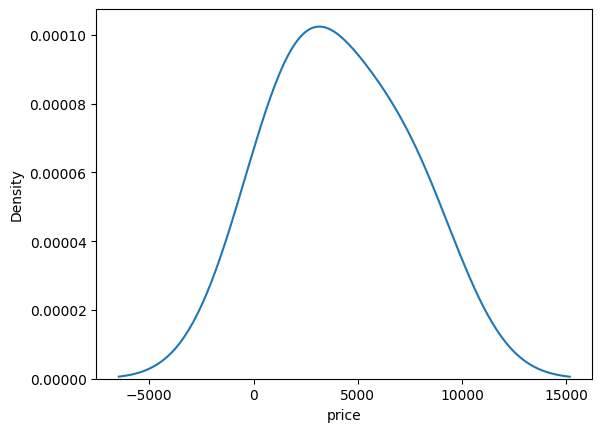

In [92]:
# Посмотрим на распределение признака price
sns.kdeplot(df['price'])

In [112]:
# Нормальное распределение, используем RobustScaler
rs_scaler = preprocessing.RobustScaler()
data_rs = rs_scaler.fit_transform(pd.DataFrame(data['price']))
data_rs = pd.DataFrame(data_rs, columns=pd.DataFrame(data['price']).columns)
data_rs.sum()

price    43501.229482
dtype: float64

In [118]:
# data = pd.read_csv('data/wine_cleared.zip')
# data.drop('Unnamed: 0', axis=1, inplace=True)
# data.head()
# Стандартизируем price
s_scaler = preprocessing.StandardScaler()
data_s = s_scaler.fit_transform(pd.DataFrame(data['price']))
data_s = pd.DataFrame(data_s, columns=pd.DataFrame(data['price']).columns)
round(data_s['price'][129968], 2)

-0.14